# DATASOURCE 1 - Web Scraping using Beautifulsoup

### What is Beautiful Soup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

In [4]:
#importing libraries for Web Sccraping
import requests
import pandas as pd
from bs4 import BeautifulSoup

### The following website has been used to scrape data https://weather.com/weather/monthly/

b'<!doctype html>\n<html lang="en-US" itemScope itemType="http://schema.org/Organization" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#" dir="ltr" data-device-class="desktop" data-connection-speed="4g"><head itemScope itemType="http://schema.org/WebSite"><meta charSet="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0, viewport-fit=cover"><script charSet="UTF-8">window.loadNewRelic=false;(function(){var rNumber=Math.random();if(rNumber>=0.95){window.loadNewRelic=true;}if(window.loadNewRelic){window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o
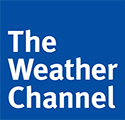
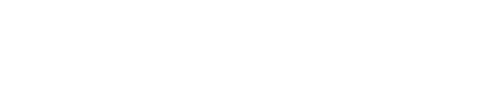

In [5]:
#Fetching the tags from website
p = requests.get("https://weather.com/weather/monthly/l/759d072e4df373e59d3c4a180b753395101712583c4e016c6386fad7b832779f")
q = p.content
print(q)

<!DOCTYPE doctype html>
<html data-connection-speed="4g" data-device-class="desktop" dir="ltr" itemscope="" itemtype="http://schema.org/Organization" lang="en-US" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#">
 <head itemscope="" itemtype="http://schema.org/WebSite">
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0, viewport-fit=cover" name="viewport"/>
  <script charset="UTF-8">
   window.loadNewRelic=false;(function(){var rNumber=Math.random();if(rNumber>=0.95){window.loadNewRelic=true;}if(window.loadNewRelic){window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)retur
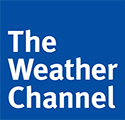
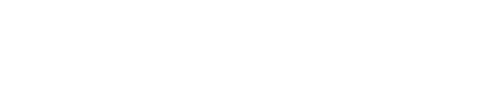

In [6]:
#Parsing HTML content using Beautifulsoup and displaying it in a more readable format
soup=BeautifulSoup(q,"html.parser")
print(soup.prettify())

In [7]:
#Fetching and printing selected Location and Date details
name = soup.find("div",{"id":"main-PageTitle-4337b557-ccef-42aa-af8c-0b0793d89c82"}).find("h1").text
selected_date = soup.find("div", {"class" : "selected-month"}).find('option', selected=True).text
print (name)
print (selected_date)

Worcester, MA Monthly Weather
Feb 2020


In [8]:
#Fetching and printing the complete details of the month
all = soup.find_all("div", {"class":["dayCell opaque","dayCell", "futureDayCell"]})
print(len(all))
print(all)

35
[<div class="dayCell opaque" classname="dayCell opaque"><div class="date">26</div><icon class="icon icon-svg icon-svg-light icon-cloudy icon-26" classname="icon icon-svg icon-svg-light icon-cloudy icon-26"><svg class="svg-cloudy" viewbox="0 0 200 200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><use class="svg-cloud" xlink:href="#svg-symbol-cloud"></use></svg></icon><div class="temps"><div class="temp hi"><span class="">42<sup>°</sup></span></div><div class="temp low"><span class="">33<sup>°</sup></span></div></div><span class="icon icon-font iconset-astro icon-phase-2" classname="icon icon-font iconset-astro icon-phase-2"></span></div>, <div class="dayCell opaque" classname="dayCell opaque"><div class="date">27</div><icon class="icon icon-svg icon-svg-light icon-cloudy icon-26" classname="icon icon-svg icon-svg-light icon-cloudy icon-26"><svg class="svg-cloudy" viewbox="0 0 200 200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/

### Printing location, date, highest and lowest temperature data of the current month

In [9]:
#Iterating and printing location, date and temperatures of current month.
dates = []
hightemp = []
high = []

for items in all[6:]:
    dates.append(items.find("div", {"class":"date"}).text)

for items in all[6:23]:
    hightemp.append(items.find("div", {"class":"temp hi"}).text[0:2])
    
for items in all[23:]:
    high.append(items.find("div", {"class":"hi"}).text[0:2])
    

hightemp.extend(high)


dataframe1 = pd.DataFrame({'Location' : name, 'Month and Year' : selected_date, 'Date': dates, 'Temperature': hightemp})
dataframe1

,Location,Month and Year,Date,Temperature
0,"Worcester, MA Monthly Weather",Feb 2020,1,34
1,"Worcester, MA Monthly Weather",Feb 2020,2,38
2,"Worcester, MA Monthly Weather",Feb 2020,3,--
3,"Worcester, MA Monthly Weather",Feb 2020,4,48
4,"Worcester, MA Monthly Weather",Feb 2020,5,37
5,"Worcester, MA Monthly Weather",Feb 2020,6,41
6,"Worcester, MA Monthly Weather",Feb 2020,7,42
7,"Worcester, MA Monthly Weather",Feb 2020,8,31
8,"Worcester, MA Monthly Weather",Feb 2020,9,39
9,"Worcester, MA Monthly Weather",Feb 2020,10,43


# Datasource2 - Using API

##  What is an API:

API stands for Application Programming Interface, and it lets developers integrate any two parts of an application or any different applications together. It consists of various elements such as functions, protocols, and tools that allow developers to build applications. A common goal of all types of APIs is to accelerate the development of applications by providing a part of its functionality out-of-the-box, so developers do not have to implement it themselves.

### Importing libraries

In [10]:
import requests
import pandas as pd
import json
import os

### Importing the dataset using API

In [11]:
api_key = '843ab6f5ecd476e8de046cede696dc3e'

### Downloading the weather forecast of a particular location

The API allows you to look up the weather anywhere on the globe, returning:

Current weather conditions, 
Minute-by-minute forecasts out to one hour, 
Hour-by-hour and day-by-day forecasts out to seven days, and
Hour-by-hour and day-by-day observations 

In [12]:
#initiate two empty list for storing the data
rawJsonData = []
dailyDetails = []
details = []
JsonData = 'https://api.darksky.net/forecast/'+ api_key +'/42.3601,-71.0589'

### The link below consists of the dataset

In [13]:
# Merged the link and the API key
print(JsonData)

https://api.darksky.net/forecast/843ab6f5ecd476e8de046cede696dc3e/42.3601,-71.0589


### Printing the data in json format

In [14]:
rawJsonData = requests.get(JsonData)
rawJsonData.json()

{'latitude': 42.3601,
 'longitude': -71.0589,
 'timezone': 'America/New_York',
 'currently': {'time': 1580771939,
  'summary': 'Clear',
  'icon': 'clear-night',
  'nearestStormDistance': 12,
  'nearestStormBearing': 14,
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 42.53,
  'apparentTemperature': 37.78,
  'dewPoint': 30.6,
  'humidity': 0.62,
  'pressure': 1011.9,
  'windSpeed': 7.79,
  'windGust': 18.38,
  'windBearing': 239,
  'cloudCover': 0.24,
  'uvIndex': 0,
  'visibility': 10,
  'ozone': 346.1},
 'minutely': {'summary': 'Clear for the hour.',
  'icon': 'clear-night',
  'data': [{'time': 1580771880, 'precipIntensity': 0, 'precipProbability': 0},
   {'time': 1580771940, 'precipIntensity': 0, 'precipProbability': 0},
   {'time': 1580772000, 'precipIntensity': 0, 'precipProbability': 0},
   {'time': 1580772060, 'precipIntensity': 0, 'precipProbability': 0},
   {'time': 1580772120, 'precipIntensity': 0, 'precipProbability': 0},
   {'time': 1580772180, 'precipInte

### Printing the day-by-day forecast of the coming week in json

In [15]:
#Printing forecast for the next week
dailyDetails = rawJsonData.json()['daily']
dailyDetails

{'summary': 'Mixed precipitation on Thursday through next Monday.',
 'icon': 'sleet',
 'data': [{'time': 1580706000,
   'summary': 'Clear throughout the day.',
   'icon': 'clear-day',
   'sunriseTime': 1580731020,
   'sunsetTime': 1580767260,
   'moonPhase': 0.31,
   'precipIntensity': 0.0006,
   'precipIntensityMax': 0.0023,
   'precipIntensityMaxTime': 1580788920,
   'precipProbability': 0.13,
   'precipType': 'snow',
   'precipAccumulation': 0.04,
   'temperatureHigh': 47.43,
   'temperatureHighTime': 1580749440,
   'temperatureLow': 35.07,
   'temperatureLowTime': 1580813040,
   'apparentTemperatureHigh': 42.72,
   'apparentTemperatureHighTime': 1580749200,
   'apparentTemperatureLow': 32.34,
   'apparentTemperatureLowTime': 1580815500,
   'dewPoint': 28.04,
   'humidity': 0.68,
   'pressure': 1007.6,
   'windSpeed': 6.56,
   'windGust': 22.82,
   'windGustTime': 1580762940,
   'windBearing': 257,
   'cloudCover': 0.21,
   'uvIndex': 2,
   'uvIndexTime': 1580748900,
   'visibility'

### Printing the forecast summary of each day of the following week along with the dates

In [16]:
#Iterating over the forecast of the week and printing the weather summary for each day with date
from datetime import datetime
d = {}
for i in dailyDetails['data']:
    d = int(i['time']), i['summary']
    print(datetime.fromtimestamp(d[0]).strftime('%Y-%m-%d'), d[1])


2020-02-03 Clear throughout the day.
2020-02-04 Overcast throughout the day.
2020-02-05 Mostly cloudy throughout the day.
2020-02-06 Light rain throughout the day.
2020-02-07 Light rain in the morning.
2020-02-08 Clear throughout the day.
2020-02-09 Possible light snow overnight.
2020-02-10 Overcast throughout the day.


### Retreiving the data from json

In [17]:
#Fetching hourly weather forecast for the next 2 days with only the details of selected columns.
details = rawJsonData.json()['hourly']
selectedcolumns = ['time', 'temperature', 'humidity',
    'pressure', 'dewPoint', 'windSpeed', 'visibility','summary'  ]
dataframe2 = pd.DataFrame(details['data'], columns=selectedcolumns)
dataframe2['time']= dataframe2['time'].apply(lambda x: datetime.fromtimestamp(x))
dataframe2

,time,temperature,humidity,pressure,dewPoint,windSpeed,visibility,summary
0,2020-02-03 18:00:00,43.03,0.61,1011.7,30.65,8.10,10,Clear
1,2020-02-03 19:00:00,41.57,0.64,1012.1,30.45,7.30,10,Clear
2,2020-02-03 20:00:00,40.27,0.68,1012.6,30.59,7.07,10,Clear
3,2020-02-03 21:00:00,39.35,0.71,1012.5,30.62,6.83,10,Clear
4,2020-02-03 22:00:00,38.83,0.71,1012.9,30.38,6.41,10,Clear
5,2020-02-03 23:00:00,37.95,0.74,1012.9,30.39,5.38,10,Clear
6,2020-02-04 00:00:00,36.86,0.78,1012.3,30.49,4.11,10,Clear
7,2020-02-04 01:00:00,36.20,0.79,1011.9,30.38,2.65,10,Clear
8,2020-02-04 02:00:00,35.90,0.80,1011.5,30.38,2.87,10,Partly Cloudy
9,2020-02-04 03:00:00,35.84,0.81,1011.3,30.58,3.38,10,Mostly Cloudy


In [18]:
#Fetching daily weather forecast for the next 7 days with only the details of selected columns.
selectedcolumns = ['time', 'temperatureHigh', 'temperatureLow', 'humidity',
    'pressure', 'dewPoint', 'windSpeed', 'visibility', 'precipType','summary'  ]
dataframe3 = pd.DataFrame(dailyDetails['data'], columns=selectedcolumns)
dataframe3['time']= dataframe3['time'].apply(lambda x: datetime.fromtimestamp(x))
dataframe3

,time,temperatureHigh,temperatureLow,humidity,pressure,dewPoint,windSpeed,visibility,precipType,summary
0,2020-02-03,47.43,35.07,0.68,1007.6,28.04,6.56,10.000,snow,Clear throughout the day.
1,2020-02-04,45.14,34.42,0.81,1009.5,34.14,4.03,10.000,rain,Overcast throughout the day.
2,2020-02-05,35.91,27.71,0.58,1017.3,19.94,8.67,10.000,rain,Mostly cloudy throughout the day.
3,2020-02-06,40.78,39.29,0.88,1009.0,32.12,7.64,3.897,rain,Light rain throughout the day.
4,2020-02-07,44.19,22.25,0.83,992.4,35.68,11.25,9.107,rain,Light rain in the morning.
5,2020-02-08,31.35,20.77,0.46,1023.2,7.62,10.29,10.000,snow,Clear throughout the day.
6,2020-02-09,34.06,29.70,0.84,1031.3,23.82,4.98,5.113,snow,Possible light snow overnight.
7,2020-02-10,42.93,31.55,0.91,1023.7,32.83,8.06,10.000,snow,Overcast throughout the day.


### Finding the missing values

In [19]:
# checking missing, NaN data in the dataframe through API
dataframe2.isnull().any()

time           False
temperature    False
humidity       False
pressure       False
dewPoint       False
windSpeed      False
visibility     False
summary        False
dtype: bool

In [20]:
# checking missing, NaN data in the dataframe through API for another dataframe
dataframe3.isnull().any()

time               False
temperatureHigh    False
temperatureLow     False
humidity           False
pressure           False
dewPoint           False
windSpeed          False
visibility         False
precipType         False
summary            False
dtype: bool

### Checking shape of the data

In [21]:
dataframe2.shape

(49, 8)

In [22]:
dataframe3.shape

(8, 10)

### Checking the entities present in the database

In [23]:
dataframe2.columns

Index(['time', 'temperature', 'humidity', 'pressure', 'dewPoint', 'windSpeed',
       'visibility', 'summary'],
      dtype='object')

In [24]:
dataframe3.columns

Index(['time', 'temperatureHigh', 'temperatureLow', 'humidity', 'pressure',
       'dewPoint', 'windSpeed', 'visibility', 'precipType', 'summary'],
      dtype='object')

### Checking the information of the data - data type and total number of records in each column

In [25]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
time           49 non-null datetime64[ns]
temperature    49 non-null float64
humidity       49 non-null float64
pressure       49 non-null float64
dewPoint       49 non-null float64
windSpeed      49 non-null float64
visibility     49 non-null int64
summary        49 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [26]:
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
time               8 non-null datetime64[ns]
temperatureHigh    8 non-null float64
temperatureLow     8 non-null float64
humidity           8 non-null float64
pressure           8 non-null float64
dewPoint           8 non-null float64
windSpeed          8 non-null float64
visibility         8 non-null float64
precipType         8 non-null object
summary            8 non-null object
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 768.0+ bytes


### Saving data to a csv file

In [27]:
dataframe2.to_csv('data.csv', index=False)

## DATASOURCE 3 - Using Raw Data

In [28]:
#Reading data from csv file
dataframe4 = pd.read_csv("weatherdata.csv")

### Displaying the output

In [29]:
dataframe4.head()

,Location,Month and Year,Date,Temperature,Humidity,Precipitation
0,"Worcester, MA",Jan-19,1,41.09,90,0.0
1,"Worcester, MA",Jan-19,2,38.75,88,0.1
2,"Worcester, MA",Jan-19,3,31.50,85,0.0
3,"Worcester, MA",Jan-19,4,32.41,93,0.0
4,"Worcester, MA",Jan-19,5,35.44,85,0.0


### Checking the information of the data - data type and total number of records in each column

In [30]:
dataframe4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 6 columns):
Location          396 non-null object
Month and Year    396 non-null object
Date              396 non-null int64
Temperature       396 non-null float64
Humidity          396 non-null int64
Precipitation     396 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.7+ KB


### Checking the total null values in the column using sum() function

In [31]:
dataframe4.isnull().sum()

Location          0
Month and Year    0
Date              0
Temperature       0
Humidity          0
Precipitation     0
dtype: int64

### Checking the shape of the data

In [32]:
dataframe4.shape

(396, 6)

### Checking the columnns

In [33]:
dataframe4.columns

Index(['Location', 'Month and Year', 'Date', 'Temperature', 'Humidity ',
       'Precipitation'],
      dtype='object')

## CONCEPTUAL MODEL

## Combining the two datasets

In [34]:
#Dataframes appended to get the current month forecast added to data from csv.
dataframe_combined = dataframe4.append(dataframe1, ignore_index = True, sort=True)
dataframe_combined

,Date,Humidity,Location,Month and Year,Precipitation,Temperature
0,1,90.0,"Worcester, MA",Jan-19,0.0,41.09
1,2,88.0,"Worcester, MA",Jan-19,0.1,38.75
2,3,85.0,"Worcester, MA",Jan-19,0.0,31.5
3,4,93.0,"Worcester, MA",Jan-19,0.0,32.41
4,5,85.0,"Worcester, MA",Jan-19,0.0,35.44
...,...,...,...,...,...,...
420,25,NaN,"Worcester, MA Monthly Weather",Feb 2020,NaN,37
421,26,NaN,"Worcester, MA Monthly Weather",Feb 2020,NaN,37
422,27,NaN,"Worcester, MA Monthly Weather",Feb 2020,NaN,38
423,28,NaN,"Worcester, MA Monthly Weather",Feb 2020,NaN,38


## Auditing the data

### Checking the information of the data - data type and total number of records in each column

In [35]:
dataframe_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 6 columns):
Date              425 non-null object
Humidity          396 non-null float64
Location          425 non-null object
Month and Year    425 non-null object
Precipitation     396 non-null float64
Temperature       425 non-null object
dtypes: float64(2), object(4)
memory usage: 20.0+ KB


### Checking the total null values in the column using sum() function

In [36]:
dataframe_combined.isnull().sum()

Date               0
Humidity          29
Location           0
Month and Year     0
Precipitation     29
Temperature        0
dtype: int64

### Checking the shape of the data

In [37]:
dataframe_combined.shape

(425, 6)

### Checking the columns of the data

In [38]:
dataframe_combined.columns

Index(['Date', 'Humidity ', 'Location', 'Month and Year', 'Precipitation',
       'Temperature'],
      dtype='object')

## Using Visualization techniques to understand the data better

In [56]:
# import pandas and matplotlib 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Variations throughout the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a213efd90>,
      dtype=object)

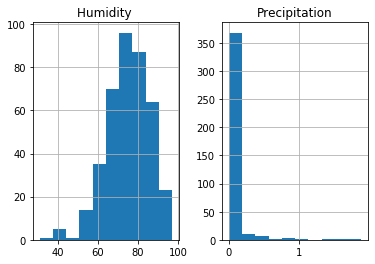

In [75]:
#Humidity and Precipitation
dataframe_combined.hist()

## ER MODEL 

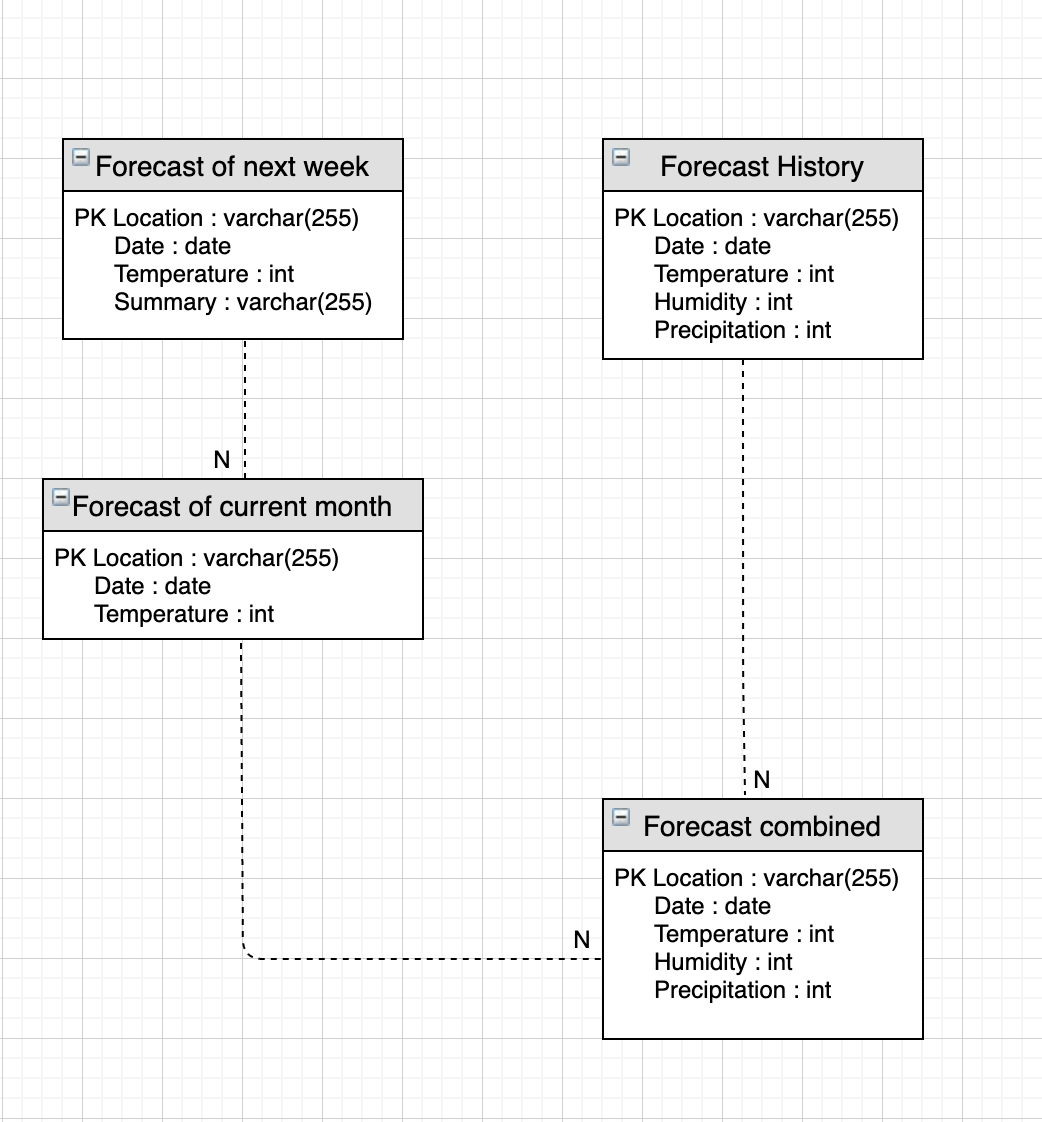

In [62]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment1/Images/ERD.png")

The above figure shows us an entity-relationship model of three different tables from the following: forecast data of next week forecast retrieved using API, forecast data of current month retrieved through web scraping and forecast history retrieved from csv file. We can infer that Location acts as a primary key which means all the data is related based on the location. In conclusion, merging three tables would result in a table which defines a combined data set of weather forecast, which is known as a conceptual database schema.

### AUDIT VALIDITY/ACCURACY

By using few commands, most of the unwanted null values were deleted from the above rows and columns which gives a report on valid and accuarate data.

### AUDIT COMPLETNESS

In real world, when weather forecast is requested from a particular customer, various fields like temperature, humidity, precipitation will be displayed based on their location. Similarly, when weather forecast is requested for a particular location, it can be accessed from the above data. This can be extended by including all the cities in the world and also many other fields like windspeed, sunrise, sunset etc.

### AUDIT CONSISTENCY/UNIFORMITY

The datasets which have been used in this assignment show a uniform relationship between each of the dataset since they are linked to each other by a common attribute. 

### REPORT

fies used : weatherdata.csv
files genearted: data.csv
Data was reformatted to fit into a conceptual model. Data was gathered from the following sources Web API, Web scraping, Raw file and are merged together to fit into a conceptual model.

Code used:
Step 1. Extraction of Data
3 main methods were used for the extraction of data:
    1.Using the API:
      Here, the API key and requests library was used to access the website using the URL and API       
      key ('843ab6f5ecd476e8de046cede696dc3e') 
      json to convert the file into json format 
      pandas to create data frames from the raw data
    2.Using the website to scrape the data
       Here, the data was extracted from the site directly using the libraries requests, BeautifulSoup, pandas.
       requests to access the website using the URL (https://weather.com/weather/monthly/)
       BeautifulSoup to scrape the contents of the website
       find() and find_all() methods were used to retrieve the desired content.
       pandas to create data frames from the raw data.
    3.By loading the csv file:
      Here, the data was extracted from a csv file on the system using the library pandas
      pandas was used to a read the csv file and load it into data frames
      read_csv method was used to read .csv file

Step 2. Cleaning and Auditing Data
        To gain knowledge about the dataset various methods like isnull, any, shape, columns, info were used.


      

### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to learn how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model.

### CONTRIBUTION
###### Your contribution towards project. How much code did you write and how much you took from other site or some other source.                                                                            
I contributed By Own: 20%                                                                                      
By External source: 50%                                                                                        
Provided by the professor : 30% 

### CITATIONS
##### Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.
https://weather.com/weather/monthly/                                                             
https://www.crummy.com/software/BeautifulSoup/bs4/doc/                                                          
https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html
https://www.geeksforgeeks.org/python-pandas-dataframe-append/
https://stackoverflow.com/questions/748491/how-do-i-create-a-datetime-in-python-from-milliseconds
https://www.geeksforgeeks.org/data-visualization-different-charts-python/

### LICENSE
Copyright 2020 Naga Vuyyuru

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.